### Importation des dépendances

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px     #conda install -c anaconda plotly

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

### Chargement du dataset

In [130]:
df=pd.read_csv("data/GlassdoorGenderPayGap.csv")
df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [131]:
df.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [132]:
df.isnull().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

In [133]:
df.describe(include=np.object)

,JobTitle,Gender,Education,Dept
count,1000,1000,1000,1000
unique,10,2,4,5
top,Marketing Associate,Male,High School,Operations
freq,118,532,265,210


In [134]:
df["AnnualSalary"]=df.BasePay+df.Bonus
df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,AnnualSalary
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
...,...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270,65914
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567,112544
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724,95071
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225,99601


### Convertir le niveau d'éducation en version numérique 

In [135]:
#si je veux changer les values au sein de ma colonne 
#df['column name'] = df['column name'].replace(['1st old value','2nd old value',...],['1st new value','2nd new value',...])

#mais je veux conserver ma colonne pour savoir à quel niveau correspond la valeur numérique dans la new colonne codeEduc
#Plusieurs methodes mais je veux choisir l'ordre d'attribution et celle du dessous ne me le permet pas (par defaut par ordre alphabetique)
#df.Education = pd.Categorical(df.Education)
#df['code'] = df.Education.cat.codes


In [136]:
# solution 1
df['codeEduc'] = df.Education.replace(["High School","College","Masters","PhD"],["1","2","3","4"])
df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,AnnualSalary,codeEduc
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301,2
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604,2
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476,4
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234,3
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783,3
...,...,...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270,65914,1
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567,112544,3
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724,95071,1
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225,99601,1


In [137]:
# solution 2
def code(row):
    if row['Education'] == 'High School':
        val = 1
    elif row['Education'] == 'College':
        val = 2
    elif row['Education'] == 'Masters':
        val = 3    
    else:
        val = 4
    return val
df['codeEduc'] = df.apply(code, axis=1)
df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,AnnualSalary,codeEduc
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301,2
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604,2
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476,4
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234,3
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783,3
...,...,...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270,65914,1
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567,112544,3
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724,95071,1
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225,99601,1


### Salaire moyen en fonction du niveau d'études et du genre

In [138]:
smes=df.groupby(["Education","Gender"])[["AnnualSalary"]].mean().reset_index()
smes

,Education,Gender,AnnualSalary
0,College,Female,92917.219512
1,College,Male,104672.228814
2,High School,Female,92194.818182
3,High School,Male,97527.909774
4,Masters,Female,99042.971963
5,Masters,Male,107659.812081
6,PhD,Female,103084.386792
7,PhD,Male,109491.590909


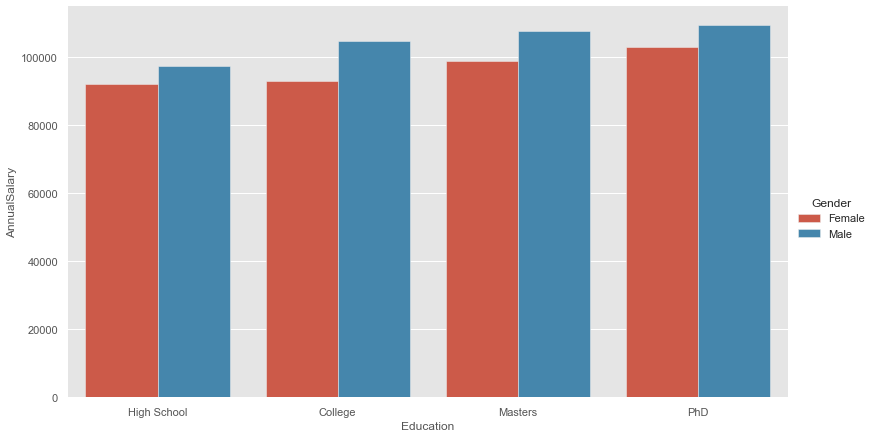

In [139]:
sns.catplot(x="Education",y="AnnualSalary",hue="Gender",data=smes,kind="bar",height=6, aspect=11/6,order=["High School","College","Masters","PhD"])

###### Quelque soit leur niveau d'études les femmes sont toujours ,en moyenne, moins bien payées que les hommes

### Répartition homme / femme en fonction du niveau d'études  

In [140]:
rhfe=df.groupby(["codeEduc","Gender"])[['Education']].count().reset_index()
rhfe

,codeEduc,Gender,Education
0,1,Female,132
1,1,Male,133
2,2,Female,123
3,2,Male,118
4,3,Female,107
5,3,Male,149
6,4,Female,106
7,4,Male,132


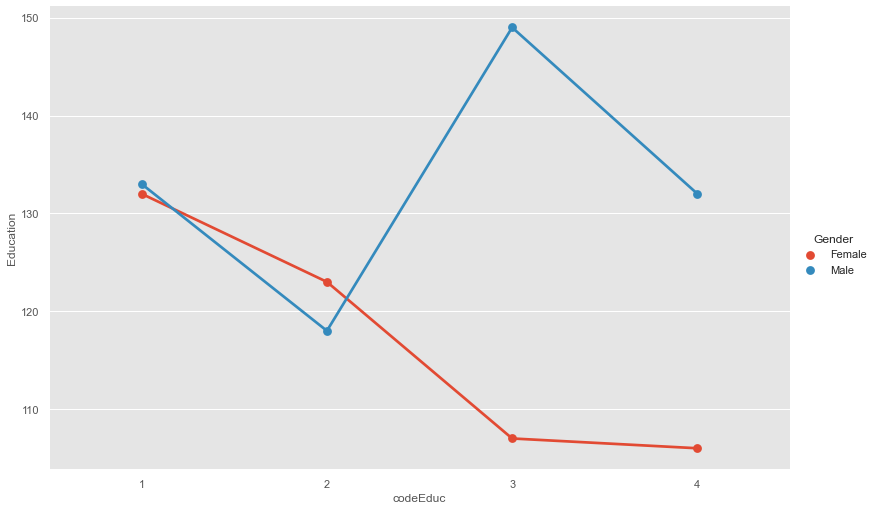

In [141]:
sns.catplot(x="codeEduc",y="Education", hue="Gender",data=rhfe, kind='point',height=7, aspect=11/7)

###### Plus le niveau d'étude est élevé moins il y a de femmes représentées. Un des multiples facteurs qui influe sur la moyenne des salaires plus basse chez les femmes 

### Salaire minimun, maximum et moyen

<AxesSubplot:ylabel='AnnualSalary'>

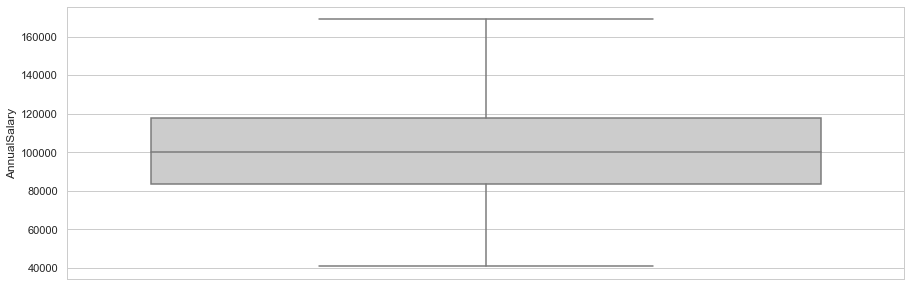

In [142]:
#Salaire médian ~9000$/an
sns.set_style('whitegrid')
sns.boxplot(y = df.AnnualSalary,color="0.8",showfliers=False)

### Salaire minimun, maximum et moyen en fonction de la profession

In [143]:
smp=df.groupby("JobTitle")[["AnnualSalary"]].agg(["min","max","mean","count"]).reset_index()
smp

JobTitle AnnualSalary                             
                                min     max           mean count
0       Data Scientist        47688  144389   98918.411215   107
1               Driver        48905  141823   95778.890110    91
2    Financial Analyst        47661  155151  101403.626168   107
3     Graphic Designer        41030  140139   97674.530612    98
4                   IT        45447  171735   97030.395833    96
5              Manager        85050  184010  131392.177778    90
6  Marketing Associate        40828  136316   82802.127119   118
7      Sales Associate        44346  146719   99670.787234    94
8    Software Engineer        59945  164521  112161.412844   109
9  Warehouse Associate        45662  142205   96798.444444    90

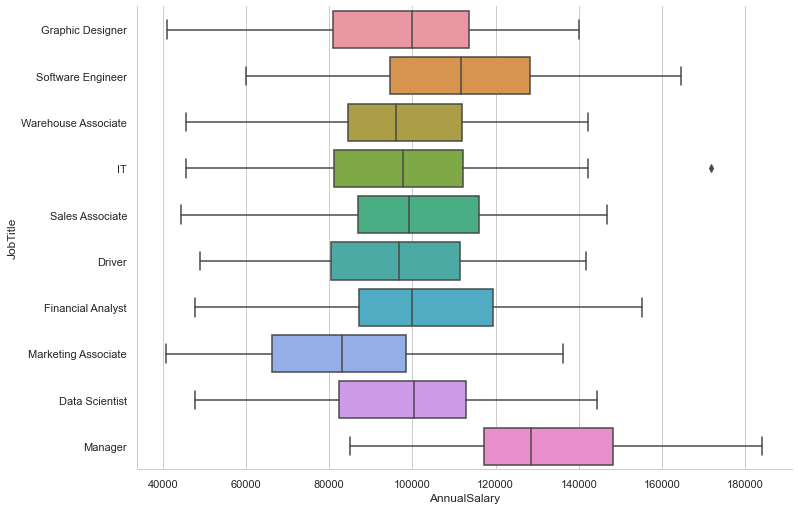

In [144]:
h = sns.catplot(y="JobTitle", x="AnnualSalary", kind="box", data=df,height=7, aspect=11/7)

##### Le salaire est élevé chez les managers et les software engineers et le salaire le plus faible chez les marketing associates. Observons si il existe une différence homme / femme au niveau du salaire au sein des ces catégories de métiers 

### Salaire moyen en fonction de la profession et du genre

In [145]:
smoy=df.groupby(["JobTitle","Gender"])[["AnnualSalary","Bonus","BasePay"]].mean().reset_index()
smoy

,JobTitle,Gender,AnnualSalary,Bonus,BasePay
0,Data Scientist,Female,102452.264151,6747.471698,95704.792453
1,Data Scientist,Male,95450.000000,6227.370370,89222.629630
2,Driver,Female,93197.347826,6329.717391,86867.630435
3,Driver,Male,98417.800000,6465.133333,91952.666667
4,Financial Analyst,Female,101743.653061,6285.326531,95458.326531
5,Financial Analyst,Male,101116.362069,6509.327586,94607.034483
6,Graphic Designer,Female,98810.416667,6567.125000,92243.291667
7,Graphic Designer,Male,96584.080000,6988.280000,89595.800000
8,IT,Female,96837.940000,6362.220000,90475.720000
9,IT,Male,97239.586957,6217.608696,91021.978261


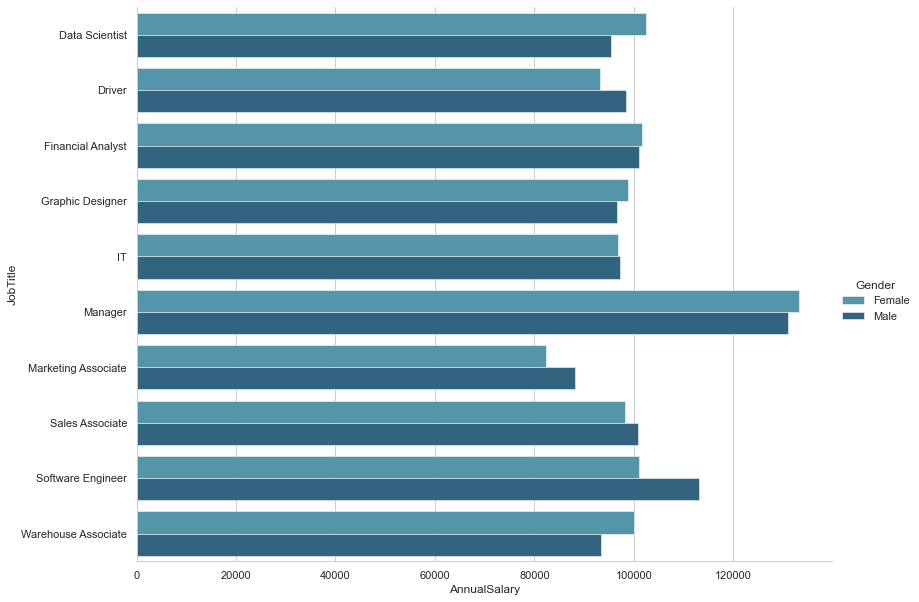

In [146]:
g = sns.catplot(x="AnnualSalary", y="JobTitle", hue="Gender",
                palette="YlGnBu_d",
                kind="bar", data=smoy,height=8.27, aspect=11.7/8.27)

###### Les femmes sont pour moins bien payées que les hommes quelque soit le métier sauf pour les data scientist et les managers. Or précédemment nous avions observé que les software engineers et le managers ont les plus gros salaires et les marketing associates les plus faibles. Analysons ensuite la répartition homme / femme au sein de ces catégories de métiers.

In [147]:
df.groupby(["JobTitle","Gender"])[["JobTitle"]].count()

JobTitle
JobTitle            Gender          
Data Scientist      Female        53
                    Male          54
Driver              Female        46
                    Male          45
Financial Analyst   Female        49
                    Male          58
Graphic Designer    Female        48
                    Male          50
IT                  Female        50
                    Male          46
Manager             Female        18
                    Male          72
Marketing Associate Female       107
                    Male          11
Sales Associate     Female        43
                    Male          51
Software Engineer   Female         8
                    Male         101
Warehouse Associate Female        46
                    Male          44

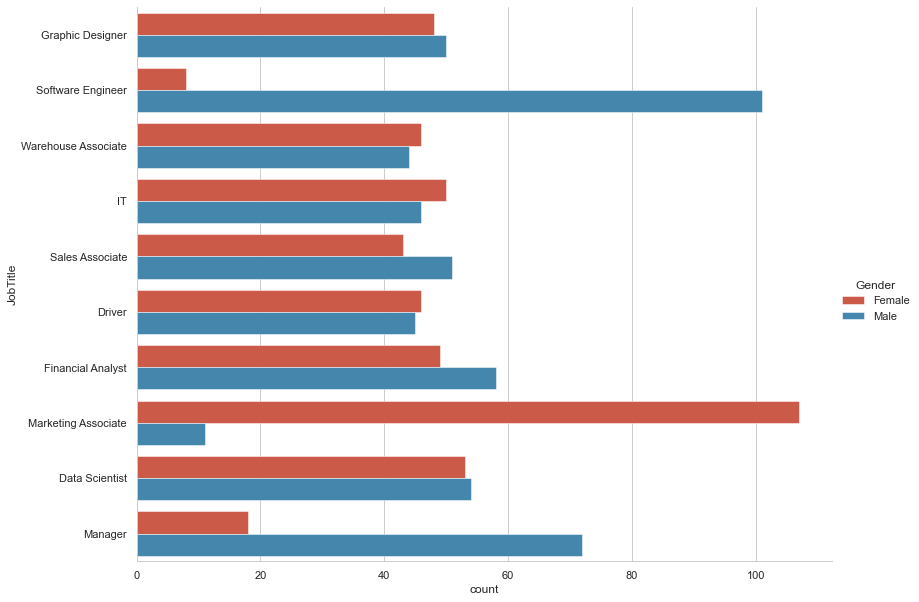

In [148]:
sns.catplot(y="JobTitle", hue="Gender", data=df, kind='count',height=8.27, aspect=11.7/8.27)

###### La répartition est plus ou moins équitable sauf au sein de la catégorie manager et software engineer où les hommes sont indiscutablement majortaire et au sein de la catégorie marketing associate ce sont les femmes qui sont majoritaires. Souvenez vous ce sont les managers et les software engineers qui ont les plus gros salaires donc majoritairement des hommes et les marketing associates les plus faibles salaires donc majoritairement des femmes. 

##### Salaire minimum en fonction de la profession

In [149]:
smin=df.groupby(["JobTitle"])[["AnnualSalary"]].min().reset_index()
smin

,JobTitle,AnnualSalary
0,Data Scientist,47688
1,Driver,48905
2,Financial Analyst,47661
3,Graphic Designer,41030
4,IT,45447
5,Manager,85050
6,Marketing Associate,40828
7,Sales Associate,44346
8,Software Engineer,59945
9,Warehouse Associate,45662


##### Salaire minimum chez les femmes en fonction de la profession

In [150]:
sminf=df[df.Gender=="Female"].groupby(["JobTitle"])[["AnnualSalary"]].min().reset_index()
sminf

,JobTitle,AnnualSalary
0,Data Scientist,47688
1,Driver,51237
2,Financial Analyst,47661
3,Graphic Designer,47695
4,IT,45447
5,Manager,107462
6,Marketing Associate,40828
7,Sales Associate,62149
8,Software Engineer,73500
9,Warehouse Associate,45662


In [151]:
left = smin.set_index(["JobTitle"])
right = sminf.set_index(["JobTitle"])

salmin=left.join(right, lsuffix='_totMin', rsuffix='_femMin')
salmin

,AnnualSalary_totMin,AnnualSalary_femMin
JobTitle,,
Data Scientist,47688,47688
Driver,48905,51237
Financial Analyst,47661,47661
Graphic Designer,41030,47695
IT,45447,45447
Manager,85050,107462
Marketing Associate,40828,40828
Sales Associate,44346,62149
Software Engineer,59945,73500


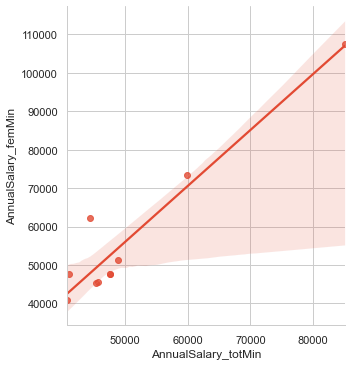

In [152]:
sns.lmplot(x='AnnualSalary_totMin', y='AnnualSalary_femMin', data=salmin)

In [153]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(salmin[['AnnualSalary_totMin']], salmin.AnnualSalary_femMin)
reg.predict(np.array([[50000]]))

array([55977.60409392])

In [154]:
sminh=df[df.Gender=="Male"].groupby(["JobTitle"])[["AnnualSalary"]].min().reset_index()
sminh.rename(columns={"AnnualSalary": "AnnualSalary_hom"})

,JobTitle,AnnualSalary_hom
0,Data Scientist,58835
1,Driver,48905
2,Financial Analyst,65347
3,Graphic Designer,41030
4,IT,53598
5,Manager,85050
6,Marketing Associate,58373
7,Sales Associate,44346
8,Software Engineer,59945
9,Warehouse Associate,50680


In [155]:
saltotmin=smin.merge(sminf,on='JobTitle').merge(sminh,on='JobTitle')
saltotmin

,JobTitle,AnnualSalary_x,AnnualSalary_y,AnnualSalary
0,Data Scientist,47688,47688,58835
1,Driver,48905,51237,48905
2,Financial Analyst,47661,47661,65347
3,Graphic Designer,41030,47695,41030
4,IT,45447,45447,53598
5,Manager,85050,107462,85050
6,Marketing Associate,40828,40828,58373
7,Sales Associate,44346,62149,44346
8,Software Engineer,59945,73500,59945
9,Warehouse Associate,45662,45662,50680


<AxesSubplot:>

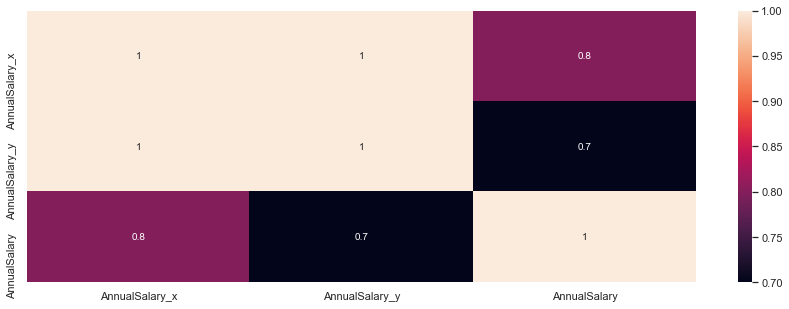

In [156]:
#etude de la correlation
matrice_corr = saltotmin.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

In [157]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#x = list(df['AnnualSalary_totMin'])
#y = list(df['AnnualSalary_femMin'])
rms = sqrt(mean_squared_error(salmin.AnnualSalary_femMin,salmin.AnnualSalary_totMin))
rms

10260.813939449443

##### Salaire moyen en fonction de l'âge, du genre et de la profession

In [158]:
smpam=df[df.Gender=="Male"].groupby([df.JobTitle,df.Age])[["AnnualSalary"]].mean()
smpam

AnnualSalary
JobTitle            Age              
Data Scientist      18        67007.5
                    19        77132.0
                    20        65579.0
                    22        58991.0
                    23        80405.5
...                               ...
Warehouse Associate 56        83892.0
                    58       142205.0
                    61       122515.0
                    64       122934.0
                    65       109530.0

[309 rows x 1 columns]

On remarque que les données ne sont pas tout à fait fiables (le fait que à 18 ans on ait un salaire très élevé ou un PhD)

### AnnualSalary en fonction de Dept, JobTitle

In [159]:
df_dj=df.groupby(['Dept','JobTitle'],axis=0,as_index=False).mean()
df_dj

,Dept,JobTitle,Age,PerfEval,Seniority,BasePay,Bonus,AnnualSalary,codeEduc
0,Administration,Data Scientist,40.920000,2.960000,3.360000,95318.440000,6566.400000,101884.840000,2.840000
1,Administration,Driver,40.411765,3.176471,3.294118,87175.941176,6572.411765,93748.352941,2.294118
2,Administration,Financial Analyst,38.230769,3.153846,3.192308,93219.923077,6606.423077,99826.346154,2.423077
3,Administration,Graphic Designer,41.600000,2.800000,3.000000,86170.933333,6157.600000,92328.533333,2.133333
4,Administration,IT,40.882353,3.235294,3.235294,90870.588235,6726.235294,97596.823529,2.470588
5,Administration,Manager,47.333333,2.416667,3.083333,129641.416667,5399.333333,135040.750000,2.666667
6,Administration,Marketing Associate,42.960000,3.080000,2.680000,70237.080000,5959.240000,76196.320000,2.440000
7,Administration,Sales Associate,40.176471,2.882353,2.764706,90372.058824,6300.823529,96672.882353,2.352941
8,Administration,Software Engineer,41.055556,3.222222,3.611111,105259.555556,7099.000000,112358.555556,2.611111
9,Administration,Warehouse Associate,37.904762,2.761905,2.857143,87043.142857,6611.380952,93654.523810,2.285714


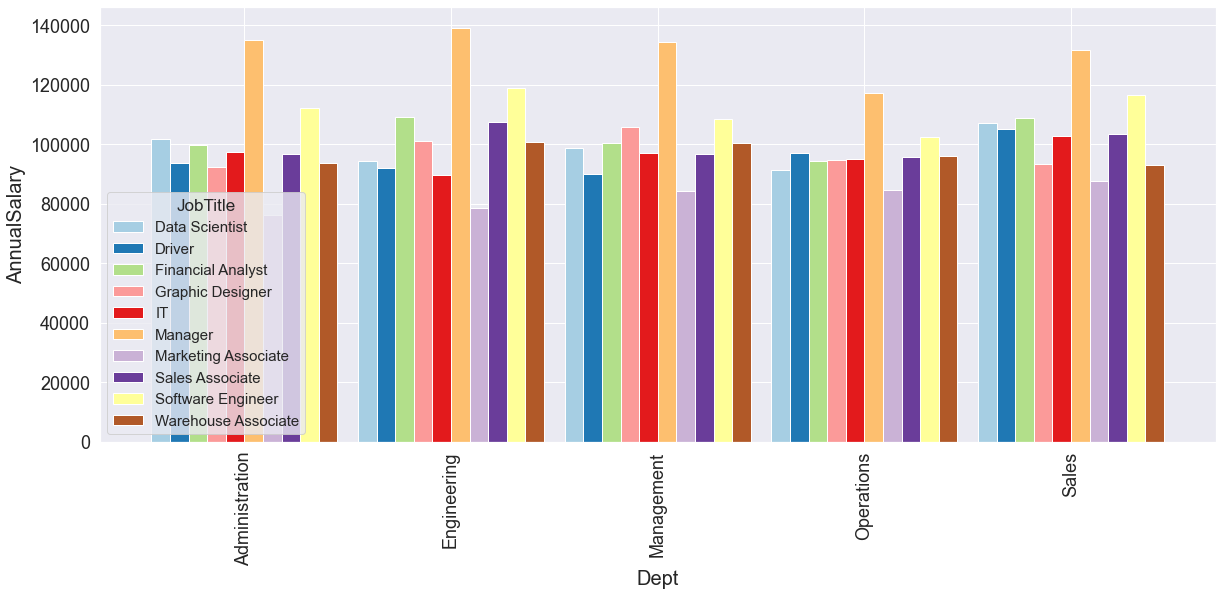

In [160]:
sns.set()
plot = df_dj.pivot('Dept','JobTitle','AnnualSalary').plot(kind='bar',figsize=(20,8),colormap='Paired',width=0.9)
plt.tick_params(labelsize=18)
plt.xlabel('Dept',size=20)
plt.ylabel('AnnualSalary',size=20)
plt.legend(loc=3,title='JobTitle',title_fontsize=17,prop={'size':15})

Text(0.5, 1.0, 'Visualisation salary (Dept,  JobTitle)')

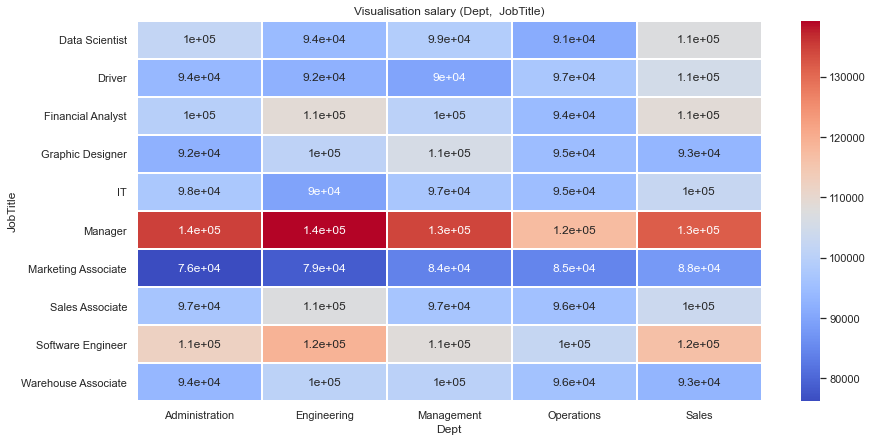

In [161]:
plt.figure(figsize=(14,7))
n = df.pivot_table(values = 'AnnualSalary', index = 'JobTitle', columns = 'Dept')
sns.heatmap(n, cmap = 'coolwarm', linecolor = 'white', linewidths = 1,annot=True)
plt.title("Visualisation salary (Dept,  JobTitle)")

###### Quelque soit le dept on observe que ce sont les managers qui ont le salaire le plus élevé
Maintenant observons cette donnée en fonction du genre. 

In [162]:
df_gjdp=df.groupby(['Dept','JobTitle','Gender'],axis=0,as_index=False).mean() 
df_gjdp

,Dept,JobTitle,Gender,Age,PerfEval,Seniority,BasePay,Bonus,AnnualSalary,codeEduc
0,Administration,Data Scientist,Female,42.300000,2.900000,3.400000,98355.600000,6424.700000,104780.300000,2.300000
1,Administration,Data Scientist,Male,40.000000,3.000000,3.333333,93293.666667,6660.866667,99954.533333,3.200000
2,Administration,Driver,Female,36.375000,3.250000,2.500000,76746.375000,7011.000000,83757.375000,2.250000
3,Administration,Driver,Male,44.000000,3.111111,4.000000,96446.666667,6182.555556,102629.222222,2.333333
4,Administration,Financial Analyst,Female,35.642857,3.000000,3.785714,94653.000000,6911.642857,101564.642857,2.285714
...,...,...,...,...,...,...,...,...,...,...
94,Sales,Sales Associate,Male,43.833333,3.333333,2.666667,100224.500000,6408.500000,106633.000000,2.333333
95,Sales,Software Engineer,Female,41.000000,4.000000,1.000000,86675.000000,7947.000000,94622.000000,4.000000
96,Sales,Software Engineer,Male,46.000000,2.809524,2.571429,112011.142857,5631.428571,117642.571429,2.142857
97,Sales,Warehouse Associate,Female,33.285714,3.571429,2.714286,81483.571429,7773.714286,89257.285714,1.571429


In [195]:
# Treemap avec la couche la plus externe comme département, puis le titre du poste et le sexe dans la couche interne
fig = px.treemap(df_gjdp, path=['Dept','JobTitle','Gender'], values='AnnualSalary',
                 color='AnnualSalary', color_continuous_scale='bugn',
                 title="Gagner de la disparité dans les titres de poste au sein de chaque département",
                 labels={"AnnualSalary":'Average AnnualSalary Total'},width=1200, height=600)
fig.show()

### Comprendre la disparité des revenus avec les antécédents scolaires
Pour comprendre si le niveau de scolarité était la raison pour laquelle les femmes étaient moins bien rémunérées que les hommes, le salaire moyen des hommes et des femmes dans un département donné a été comparé en fonction de leur niveau de scolarité.

In [164]:
# Remodeler les données pour obtenir le salaire moyen de chacun pour les hommes et les femmes selon le niveau de scolarité
df_gedp=df.groupby(['Dept','Education','Gender'],axis=0,as_index=False).mean() 
df_gedp.head()

,Dept,Education,Gender,Age,PerfEval,Seniority,BasePay,Bonus,AnnualSalary,codeEduc
0,Administration,College,Female,42.571429,2.928571,3.071429,85577.892857,6335.214286,91913.107143,2.0
1,Administration,College,Male,38.875000,3.041667,3.625000,96858.750000,6812.458333,103671.208333,2.0
2,Administration,High School,Female,42.200000,2.240000,3.160000,87103.640000,5429.320000,92532.960000,1.0
3,Administration,High School,Male,41.681818,2.727273,3.000000,90553.090909,5768.909091,96322.000000,1.0
4,Administration,Masters,Female,39.925926,3.296296,3.148148,89867.296296,6803.222222,96670.518519,3.0


In [196]:
# Graphique Sunburst avec la couche la plus interne comme éducation, 
# puis le département et le sexe dans la couche la plus externe
fig = px.sunburst(df_gedp, path=['Dept','Education','Gender'], values='AnnualSalary',
                 color='AnnualSalary', color_continuous_scale='bugn',title="Gagner des disparités dans les niveaux d'éducation",
                  labels={"AnnualSalary":'Average AnnualSalary Total'})
fig.show()

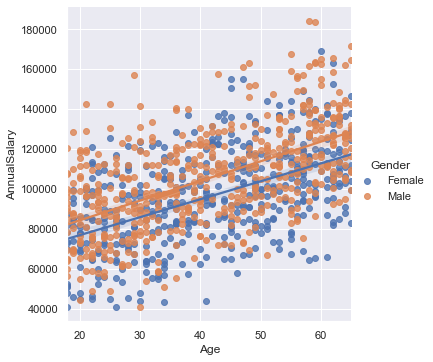

In [166]:
sns.lmplot(x="Age",y="AnnualSalary",hue="Gender",data=df)

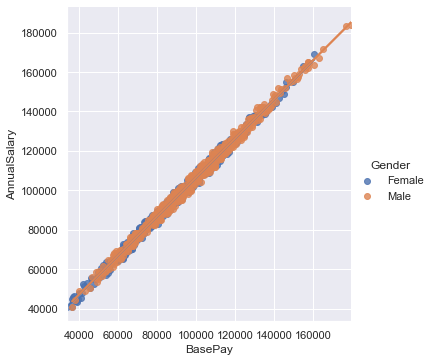

In [167]:
sns.lmplot(x="BasePay",y="AnnualSalary",hue="Gender",data=df)

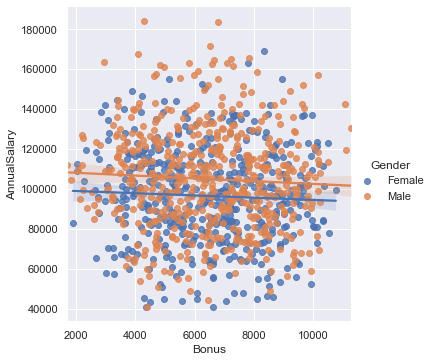

In [168]:
sns.lmplot(x="Bonus",y="AnnualSalary",hue="Gender",data=df)

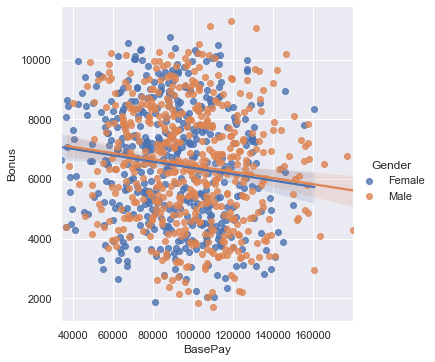

In [169]:
sns.lmplot(x="BasePay",y="Bonus",hue="Gender",data=df)

### Comparaison de BasePay par AnnualSalary
#### x: BasePay     
#### y: AnnualSalary

In [170]:
# que Female
dff=df[df.Gender=="Female"].reset_index(drop=True)
# que male
dfm=df[df.Gender=="Male"].reset_index(drop=True)

def cala(x,y,df):
    a=(len(df)*(x*y).sum()-x.sum()*y.sum())/(len(df)*(x**2).sum()-(x.sum())**2)
    return a
def calb(x,y,df):
    b=(y.sum()*(x**2).sum()-x.sum()*(x*y).sum())/(len(df)*(x**2).sum()-(x.sum())**2)
    return b


def pred (x,col_x,col_y,df):
    a=cala(col_x,col_y,df)
    b=calb(col_x,col_y,df)
    return a * x + b

def rmse(col_x,col_y,df):
    res = 0
    for i in range(len(col_x)):
        res += ((pred(col_x[i],col_x,col_y,df)-col_y[i])**2)/len(col_x)    
    return res**(1/2)

<ipython-input-170-05bef0411902>:10: RuntimeWarning:

overflow encountered in longlong_scalars



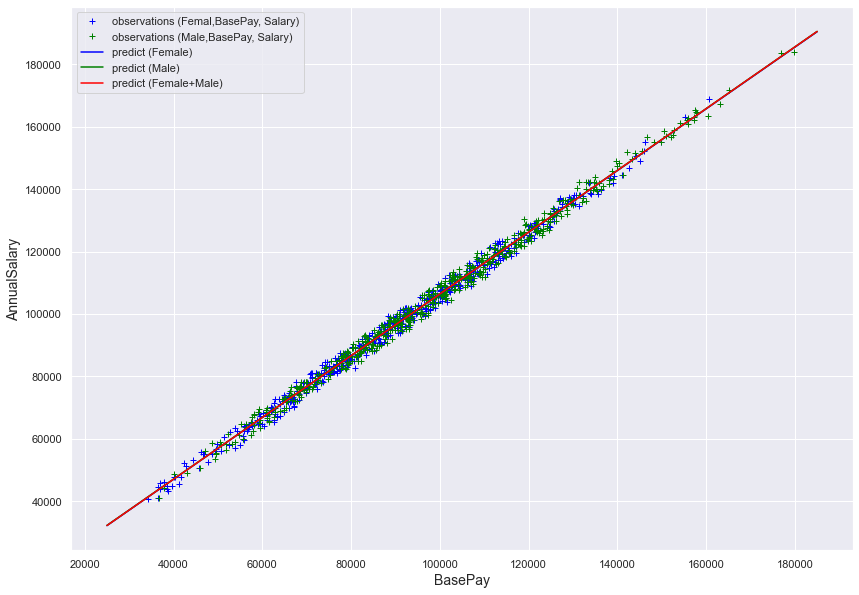

In [171]:
fig = plt.figure(figsize=(14,10))
plt.plot(dff['BasePay'],dff['AnnualSalary'],'+',c='blue',label='observations (Femal,BasePay, Salary)')
plt.plot(dfm['BasePay'],dfm['AnnualSalary'],'+',c='green',label='observations (Male,BasePay, Salary)')
plt.plot([25000, 185000], [pred(25000,dff.BasePay,dff.AnnualSalary,dff) , pred(185000,dff.BasePay,dff.AnnualSalary,dff)],c='blue',label="predict (Female)"  )
plt.plot([25000, 185000], [pred(25000,dfm.BasePay,dfm.AnnualSalary,dfm) , pred(185000,dfm.BasePay,dfm.AnnualSalary,dfm)],c='green',label="predict (Male)" )
plt.plot([25000, 185000], [pred(25000,df.BasePay,df.AnnualSalary,df) , pred(185000,df.BasePay,df.AnnualSalary,df)],c='red',label="predict (Female+Male)" )

plt.xlabel('BasePay', fontsize=14)
plt.ylabel('AnnualSalary', fontsize=14)
plt.legend()
plt.show()

### RMSE

In [172]:
rmse(df.BasePay,df.AnnualSalary,df)

<ipython-input-170-05bef0411902>:10: RuntimeWarning:

overflow encountered in longlong_scalars



1986.510398294108

In [173]:
# Que Female
rmse(dff.BasePay,dff.AnnualSalary,dff)

<ipython-input-170-05bef0411902>:10: RuntimeWarning:

overflow encountered in longlong_scalars



1990.6723980443253

In [174]:
# Que Male
rmse(dfm.BasePay,dfm.AnnualSalary,dfm)

<ipython-input-170-05bef0411902>:10: RuntimeWarning:

overflow encountered in longlong_scalars



1982.1683857322507

### Calcule R Squared

In [175]:
R2=((pred(df.BasePay,df.BasePay,df.AnnualSalary,df)-df.AnnualSalary.mean())**2).sum()/((df.AnnualSalary-df.AnnualSalary.mean())**2).sum()
R2

<ipython-input-170-05bef0411902>:10: RuntimeWarning:

overflow encountered in longlong_scalars



0.9937581644792445

### Prediction du salaire (AnnualSalary) en fonction de l'Age 

#### Solution 1

In [176]:
# x: Age, y: salary
def cala(df):
    a=(len(df)*(df.Age*df.AnnualSalary).sum()-df.Age.sum()*df.AnnualSalary.sum())/(len(df)*(df.Age**2).sum()-(df.Age.sum())**2)
    return a
a=cala(df)
a

939.2501277135057

In [177]:
def calb(df):
    b=(df.AnnualSalary.sum()*(df.Age**2).sum()-df.Age.sum()*(df.Age*df.AnnualSalary).sum())/(len(df)*(df.Age**2).sum()-(df.Age.sum())**2)
    return b
b=calb(df)
b

62061.43346355486

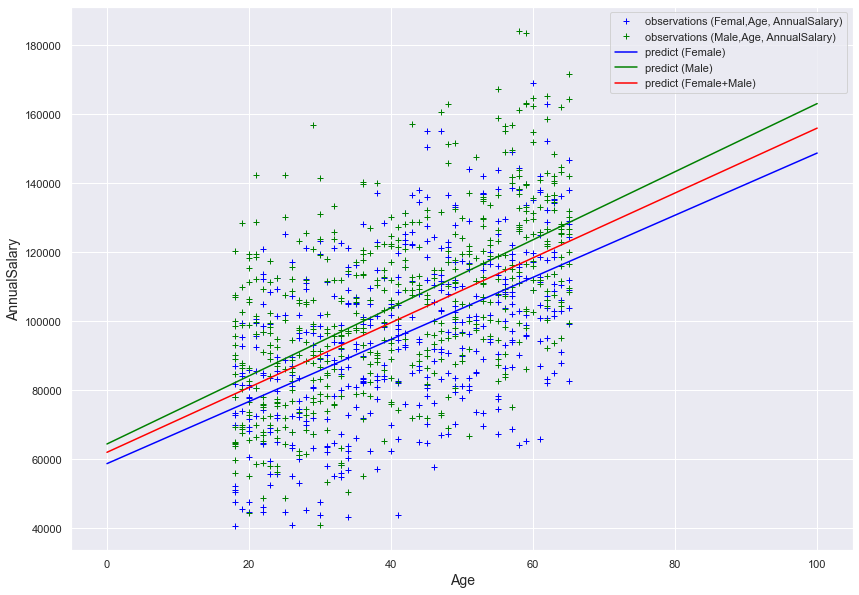

In [178]:
# Predict salary par age   x:Age  y:salary
# que Female
dff=df[df.Gender=="Female"].reset_index(drop=True)
# que male
dfm=df[df.Gender=="Male"].reset_index(drop=True)

def cala(df):
    a=(len(df)*(df.Age*df.AnnualSalary).sum()-df.Age.sum()*df.AnnualSalary.sum())/(len(df)*(df.Age**2).sum()-(df.Age.sum())**2)
    return a
def calb(df):
    b=(df.AnnualSalary.sum()*(df.Age**2).sum()-df.Age.sum()*(df.Age*df.AnnualSalary).sum())/(len(df)*(df.Age**2).sum()-(df.Age.sum())**2)
    return b

def pred (x,df):
    a=cala(df)
    b=calb(df)
    return a * x + b

def rmse(data_x,data_y,df):
    res = 0
    for i in range(len(data_x)):         
        res += ((pred(data_x[i],df)-data_y[i])**2)/len(data_x)
    return res**(1/2)

fig = plt.figure(figsize=(14,10))
plt.plot(dff['Age'],dff['AnnualSalary'],'+',c='blue',label='observations (Femal,Age, AnnualSalary)')
plt.plot(dfm['Age'],dfm['AnnualSalary'],'+',c='green',label='observations (Male,Age, AnnualSalary)')
plt.plot([0, 100], [pred(0,dff) , pred(100,dff)],c='blue',label="predict (Female)"  )
plt.plot([0, 100], [pred(0,dfm) , pred(100,dfm)],c='green',label="predict (Male)" )
plt.plot([0, 100], [pred(0,df) , pred(100,df)],c='red',label="predict (Female+Male)" )

plt.xlabel('Age', fontsize=14)
plt.ylabel('AnnualSalary', fontsize=14)
plt.legend()
plt.show()

#### Solution 2 

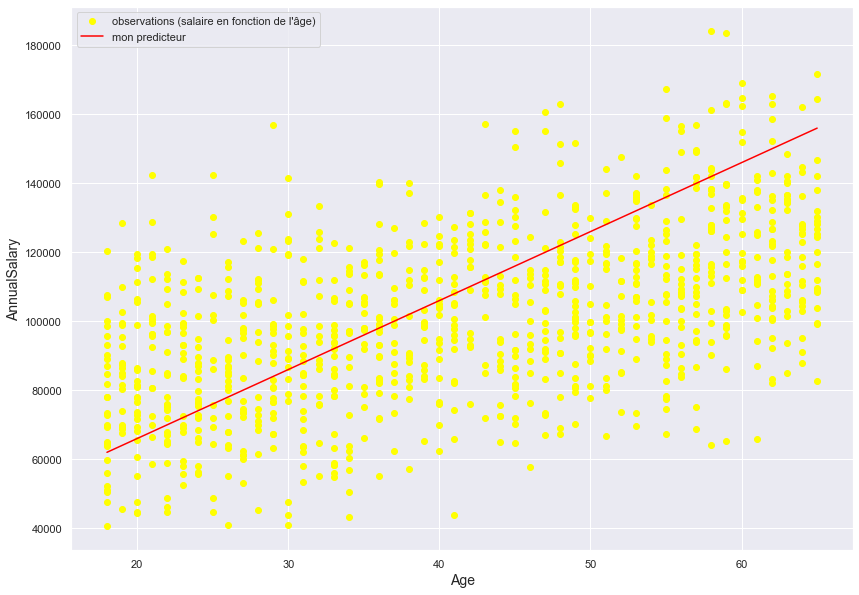

In [179]:
import matplotlib.pyplot as plt
x = list(df['Age'])
y = list(df['AnnualSalary'])


def param(x,y,z):
    
    x_y = sum_x = sum_y = x_x = 0
    
    for i in range(len(x)):
        x_y = (x[i] * y[i]) + x_y
        sum_x = x[i]+sum_x
        sum_y= y[i]+sum_y
        x_x = (x[i]*x[i]) + x_x

    a = (len(x)*x_y - sum_x*sum_y)/(len(x)*x_x - sum_x*sum_x)
    b = (sum_y * x_x - sum_x * x_y) / ( len(x)*x_x  - sum_x*sum_x)
    
    return a*z+b

fig = plt.figure(figsize=(14,10))
plt.plot(df['Age'],df['AnnualSalary'],'o',c='yellow',label="observations (salaire en fonction de l'âge)")
plt.plot([18,65],[param(x,y,0),param(x,y,100)],c='red',label='mon predicteur')

plt.xlabel('Age', fontsize=14)
plt.ylabel('AnnualSalary', fontsize=14)
plt.legend()
plt.show()

### Calcue RMSE

In [180]:
rmse(df.Age,df.AnnualSalary,df)

21263.40752522824

In [181]:
# que Female
rmse(dff.Age,dff.AnnualSalary,dff)

20749.176326902572

In [182]:
# que Male
rmse(dfm.Age,dfm.AnnualSalary,dfm)

20740.53093744367

### Calcule R Squared

In [183]:
# solution 1
R2=((pred(df.Age,df)-df.AnnualSalary.mean())**2).sum()/((df.AnnualSalary-df.AnnualSalary.mean())**2).sum()
R2

0.28485128851108316

In [184]:
# solution 2
R2=1-(((pred(df.Age,df)-df.AnnualSalary)**2).sum()/((df.AnnualSalary-df.AnnualSalary.mean())**2).sum())
R2

0.2848512885110833

### sklearn

In [185]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [186]:
# Feature sets
X = df[['Age']].values
y = df['AnnualSalary'].values

# Split in train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 1) (800,)
Test set: (200, 1) (200,)


In [187]:
# Model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)

# The coefficients
print (f'Coefficients: {regr.coef_}')
print (f'Intercept: {regr.intercept_}')

Coefficients: [939.76533429]
Intercept: 61577.59620056474


In [188]:
# Evaluation of the predictions with the test data
y_test_pred = regr.predict(X_test)

print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_test_pred)}')
print(f'Root Mean Squared Error (RMSE): {(mean_squared_error(y_test, y_test_pred))**0.5}')
print(f'R2 Score: {r2_score(y_test , y_test_pred)}')

Mean Squared Error (MSE): 508065500.2883172
Root Mean Squared Error (RMSE): 22540.308345014208
R2 Score: 0.24787164813251417


### Multiple Linear Regression

In [189]:
# dept_dummies = pd.get_dummies(df['Dept'])
df['codeEduc'] = df.Education.replace(["High School","College","Masters","PhD"],["1","2","3","4"])
df['Female']=df.Gender.replace(["Female","Male"],["1","0"])
df

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,AnnualSalary,codeEduc,Female
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301,2,1
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604,2,0
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476,4,1
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234,3,0
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270,65914,1,1
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567,112544,3,0
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724,95071,1,0
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225,99601,1,0


In [190]:
# Feature sets
X = df.loc[:, df.columns.isin(['Age', 'PerfEval', 'Seniority', 'codeEduc', 'Female'])].values
y = df['AnnualSalary'].values

print('Independent variables: {}'.format(df.loc[:, df.columns.isin(['Age', 'PerfEval', 'Seniority', 'codeEduc', 'Female'])].columns.values))

# Split in train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Independent variables: ['Age' 'PerfEval' 'Seniority' 'codeEduc' 'Female']
Train set: (800, 5) (800,)
Test set: (200, 5) (200,)


In [191]:
# Model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)

# The coefficients
print (f'Coefficients: {regr.coef_}')
print (f'Intercept: {regr.intercept_}')

Coefficients: [   958.13822516    706.86268529   9627.21522628   2379.48948576
 -10211.16809059]
Intercept: 28917.506919007763


In [192]:
# Model
# Evaluation of the predictions with the test data
y_test_pred = regr.predict(X_test)

print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_test_pred)}')
print(f'Root Mean Squared Error (RMSE): {(mean_squared_error(y_test, y_test_pred))**0.5}')
print(f'R2 Score: {r2_score(y_test , y_test_pred)}')

Mean Squared Error (MSE): 264364815.250233
Root Mean Squared Error (RMSE): 16259.299346842501
R2 Score: 0.608640475149219


### Test Model

In [193]:
employee_data = [[21, 5, 5, 2, 0]]
salary = regr.predict(employee_data)
print(f'Estimated salary: {salary[0]:.2f} USD')
# real 119604 USD

Estimated salary: 105467.78 USD


In [194]:
employee_data = [[19, 4, 5, 4, 1]]
salary = regr.predict(employee_data)
print(f'Estimated salary: {salary[0]:.2f} USD')
# real 99476 USD

Estimated salary: 97392.45 USD
